In [215]:
import time
import timeit
import numpy as np
import pandas as pd

# Q1

Matrix multiplication between two matrices of size (n,k) , (k,m) gives a matrix of size(n,m), showing there will be n*m matrices in the matrix, 

For each element in the matrix to obtain, we should multiply k elements in the row of (n,k) matrix and k elements in the column of (k,m) matrix, 
which means there will be k multiplications for each element. Since, there are n*m matrices there will be n*m*k multiplications.

For K multiplications there will be (k-1) additions(for adding k numbers we need k-1 addition operations for 1 element). 
so, for n*m elements there will be (n)*(m)*(k-1) 


 multiplications needed to perform a matrix multiplication between (n, k) and (k, m) matrices is: (n)*(m)*(k)
 
 Additions needed to perform a matrix multiplication between (n, k) and (k, m) matrices is: (n)*(m)*(k-1)

# Q2

In [216]:
def matrix_multipy(A,B):
  m1,n1 = A.shape
  m2,n2 = B.shape
  C = [[0]*n2 for i in range(m1)]
  for i  in range(m1):
    for j in range(n2):
      for k in range(n1):
        C[i][j] += A[i][k]*B[k][j]

  return C

def print_(C):

  m1,n2 = C.shape
  print("Matrix Multiplication of the A and B matrices")
  for i in range(m1):
    for j in range(n2):
      print(C[i][j], end = " ")
    print()

  
A = np.random.randint(0,100,(2,3))
B = np.random.randint(0,100,(3,4))
C = np.array(matrix_multipy(A,B))
print_(C)

print("Matrix multiplication using numpy")
A= np.array(A)
B= np.array(B)
C1 = np.dot(A,B)
print(C1)

Matrix Multiplication of the A and B matrices
9673 8526 5204 7732 
15615 10517 9335 13437 
Matrix multiplication using numpy
[[ 9673  8526  5204  7732]
 [15615 10517  9335 13437]]


In [217]:
mysetup = '''
import numpy as np
from __main__ import matrix_multiplication
A = np.random.randint(0,100,(100,100))
B  = np.random.randint(0,100,(100,100))
'''

statement = ''' 
c   = matrix_multiplication(A,B)
'''
number = 5
time = timeit.timeit(setup = mysetup, stmt =statement,number = 5)
print("execution time of the prgram is : " + str((time/number)*1000) + " ms")

statement = '''
C = np.dot(A,B)
'''
time = timeit.timeit(setup = mysetup, stmt =statement ,number = 5)
print("execution time of numpy module is : " + str((time/number)*1000) + " ms")

execution time of the prgram is : 804.9509720003698 ms
execution time of numpy module is : 0.7943540003907401 ms


The time difference is huge between a numpy and a normal multiplication program. Numpy breaks down a task into multiple parts and then processes all the parts parallelly, which is why it is faster than the normal multiplication program.

#Q3

Let us consider that there is an array of length n.

Case1: If n is even, then the median is average of (n/2)th maximum, ((n/2)+1)th maximum elements. From the given information, it takes (n/2) passes to find (n/2+1)th element and (n/2+1) passes to find (n/2) passes. One iteration of an array is n operations.

Number of Operations  = (n/2)^2 + ((n/2) + 1)^2 == O(n^2)

Time Complexity = O(n^2)

Case2: If n is odd, then the median is ((n+1)/2)th maximum elements. From the given information,  One iteration of an array is n operations.

Number of Operations = ((n+1)/2)^2 == O(n^2)

Time Complexity = O(n^2)

Optimised Methods:

1. Sort the elements in the array and find the median of the array, which takes the time complexity O(n(logn))


In [218]:
import time
import timeit
import numpy as np

def normal_median_find(A):
    n = len(A)
    freq = {}
    for i in range((n//2)+1):
        maximum_index = -1
        for j in range(n):
            freq.setdefault(j,-1)
            if freq[j] == -1:
                if maximum_index == -1:
                    maximum_index = j
                    
                if A[j] >= A[maximum_index]:
                    maximum_index = j
                    
        if i == n//2-1:
            max1 = A[maximum_index]
        if i == n//2:
            max2 = A[maximum_index]
            
        freq[maximum_index] = 1
        
    if n%2 == 0:
        median = (max1+max2)/2
    else:
        median = max2
        
    return median

def optimum_median_find(arr):
    n = len(arr)
    arr.sort()
    
    if n%2 == 0:
        return (arr[n//2] + arr[n//2-1])/2
    else:
        return arr[n//2]
    


In [219]:
A = np.random.randint(8,100,(4))
print(A)
median = normal_median_find(A)
print("The median of array A is ", str(median))
print()
median = optimum_median_find(A)
print("The median of array A using optimised method ", str(median))
print()
print("Median of array A using numpy ", str(np.median(A)))
print()

[79 31 84 60]
The median of array A is  69.5

The median of array A using optimised method  69.5

Median of array A using numpy  69.5



In [220]:
def time_find(A):
    time_norm, time_optim,time_numpy= [],[],[]
    number = 1000
    for i in range(number):
        start = time.time()
        C = normal_median_find(A)
        end = time.time()
        time_norm.append((end-start)*1000)
        start = time.time()
        c = optimum_median_find(A)
        end = time.time()
        time_optim.append((end-start)*1000)
        start = time.time()
        d = optimum_median_find(A)
        end = time.time()
        time_numpy.append((end-start)*1000)
        
        
    norm_mean,norm_std = np.mean(np.array(time_norm)),np.std(np.array(time_norm))
    optim_mean,optim_std = np.mean(np.array(time_optim)),np.std(np.array(time_optim))
    numpy_mean, numpy_std = np.mean(np.array(time_numpy)), np.std(np.array(time_numpy))
    return norm_mean,norm_std,optim_mean,optim_std,numpy_mean,numpy_std

A = np.random.randint(8,100,(100))
norm_mean,norm_std, optim_mean,optim_std, numpy_mean, numpy_std = time_find(A)
print("The mean of the normal program is", norm_mean, "," "The standard deviation of the normal program is", norm_std)
print("The mean of the optimum program is",optim_mean, "," "The standard deviation of the optimum program is", optim_std)
print("The mean of the numpy module is", numpy_mean, "," "The standard deviation of the numpy module is", numpy_std)

The mean of the normal program is 1.909470796585083 ,The standard deviation of the normal program is 0.23872124715029483
The mean of the optimum program is 0.016075611114501953 ,The standard deviation of the optimum program is 0.05341462426006161
The mean of the numpy module is 0.01591658592224121 ,The standard deviation of the numpy module is 0.055799335174393186


In [221]:
mysetup = '''
import numpy as np
from __main__ import normal_median_find
A = np.random.randint(0,100,(100))
'''

statement = ''' 
c   = normal_median_find(A)
'''
number = 1000
time = timeit.timeit(setup = mysetup, stmt =statement,number = 1000)
print("execution time of the prgram is : " + str((time/number)*1000) + " ms")

statement = '''
import numpy as np
C = np.median(A)

'''
time = timeit.timeit(setup = mysetup, stmt =statement ,number = 1000)
print("execution time of numpy module is : " + str((time/number)*1000) + " ms")

execution time of the prgram is : 1.9014353659986227 ms
execution time of numpy module is : 0.024849998000718188 ms


# Q4

$ Function\; : \; x^{2}y + y^{3}sin(x) $

$ The\;   gradient\;  function\;  wrt\;  x\; : \; 2xy + y^{3}cos(x) $

$ The\; gradient\; function\; wrt\; y\; : \; x^{2} + 3y^{2}sin(x) $

# Q5

In [222]:
import jax
import jax.numpy as jnp 
from jax import random


def g(x): 
  a,b = x[0],x[1]
  return ((a**2)*b)+((b**3)*jnp.sin(a))

def differ_gxy(x):
  a,b = x[0],x[1]
  return ((2*a)*b + (b**3)*jnp.cos(a)), ((a**2)+(3*(b)**2)*jnp.sin(a))

gradf = jax.grad(g)

x = np.random.uniform(1,2,(5,2))
for i in range(5):

  print(f"gradient from jax {gradf(x[i])}  | gradient computed manually {differ_gxy(x[i])[0]}, {differ_gxy(x[i])[1]}")



gradient from jax [3.9559598 5.7281275]  | gradient computed manually 3.9559593200683594, 5.7281270027160645
gradient from jax [ 5.3161054 10.209996 ]  | gradient computed manually 5.316105365753174, 10.209997177124023
gradient from jax [4.479385 8.878315]  | gradient computed manually 4.4793853759765625, 8.878315925598145
gradient from jax [3.5062149 5.8340025]  | gradient computed manually 3.5062146186828613, 5.834002494812012
gradient from jax [4.4180074 9.10186  ]  | gradient computed manually 4.418006896972656, 9.101859092712402


# Q6

In [223]:
import sympy as sy
x = sy.Symbol('x')
y = sy.Symbol('y')
func = (x**2)*y + (y**3)*sy.sin(x)

print("Given Function: ", func)
print("function differentiate wrt x: ", sy.diff(func,x))
print("function differentiate wrt y: ", sy.diff(func,y))

Given Function:  x**2*y + y**3*sin(x)
function differentiate wrt x:  2*x*y + y**3*cos(x)
function differentiate wrt y:  x**2 + 3*y**2*sin(x)


# Q7

In [224]:
database ={}

year_2022={}
Branch1_2022= {}
Branch2_2022 = {}

Branch1_2022[1] = {'Roll Number': '20110036', 'Name': 'Karthik', 'Marks': {'Maths': '100', 'English': '70'}}
Branch2_2022[2] = {'Roll Number': '20110345', 'Name': 'Ram', 'Marks': {'Maths': '90', 'English': '80'}}

year_2022[1] = Branch1_2022
year_2022[2] = Branch2_2022    

year_2023 = {}
Branch1_2023 = {}
Branch2_2023 = {}

Branch1_2023[1] = {'Roll Number': '21110036', 'Name': 'Abhi', 'Marks': {'Maths': '50', 'English': '60'}}
Branch2_2023[2] = {'Roll Number': '21110345', 'Name': 'Akshay', 'Marks': {'Maths': '60', 'English': '80'}}

year_2023[1] = Branch1_2023
year_2023[2] = Branch2_2023

database[2022] = year_2022
database[2023] = year_2023

print(database)

{2022: {1: {1: {'Roll Number': '20110036', 'Name': 'Karthik', 'Marks': {'Maths': '100', 'English': '70'}}}, 2: {2: {'Roll Number': '20110345', 'Name': 'Ram', 'Marks': {'Maths': '90', 'English': '80'}}}}, 2023: {1: {1: {'Roll Number': '21110036', 'Name': 'Abhi', 'Marks': {'Maths': '50', 'English': '60'}}}, 2: {2: {'Roll Number': '21110345', 'Name': 'Akshay', 'Marks': {'Maths': '60', 'English': '80'}}}}}


# Q8

In [225]:

class year:
    
    def __init__(self, year):
        self.acad_year = year
        self.branches = []

    def __str__(self):
      return f"{self.aca_year},{self.branches})"
    

class branch:
    
    def __init__(self,name):
        self.branch_name = name
        self.students = []

    def __str__(self):
      return f"{self.branch_name},{self.students})"
  

class student:
    
    def __init__(self, Name, Roll_no, subjects, marks): 
        self.Name = Name
        self.Roll_no = Roll_no
        self.marks = marks
        self.subjects = subjects 

    def __str__(self):
      return f"{self.Name},{self.Roll_no},{self.marks},{self.subjects})" 



s1 = student("Karthik", 20110036, ["Maths", "English"],[70, 80])
s2 = student("Ram", 20110126, ["Maths", "English"],[80, 90])
b1 = branch("CSE")
b2 = branch("ME")
b3 = branch("EE")
b4 = branch("CE")
b1.students.append(s1)
b2.students.append(s2)

y1 = year("2022")
y1.branches.append(b1)
y1.branches.append(b2)


s3 = student("Abhi", 21110036, ["Maths", "Science"],[50, 39])
s4 = student("Abay", 21110126, ["Maths", "Sience"],[60, 45])

b3.students.append(s3)
b4.students.append(s4)

y2 = year("2023")
y2.branches.append(b3)
y2.branches.append(b4)


years = [y1,y2]

for i in years:
    print(i.acad_year)
    for j in i.branches:
        for k in j.students : 
            print(f"{k.Name},{k.Roll_no},{k.marks},{k.subjects}")







2022
Karthik,20110036,[70, 80],['Maths', 'English']
Ram,20110126,[80, 90],['Maths', 'English']
2023
Abhi,21110036,[50, 39],['Maths', 'Science']
Abay,21110126,[60, 45],['Maths', 'Sience']


# Q9

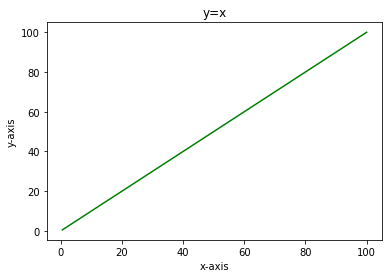

In [226]:
import matplotlib.pyplot as plt

x = np.linspace(0.5,100,199)

y = x


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.title('y=x')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x,y, 'g')


plt.show()

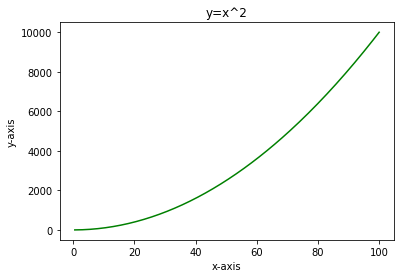

In [227]:

y = x**2

fig = plt.figure()

plt.title('y=x^2')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x,y, 'g')
plt.show()

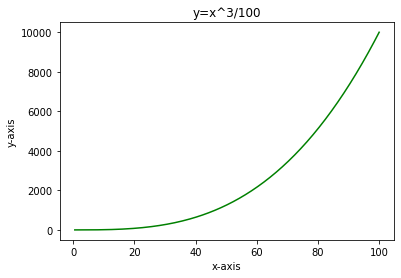

In [228]:
y = x**3/100

fig = plt.figure()

plt.title('y=x^3/100')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x,y, 'g')

plt.show()

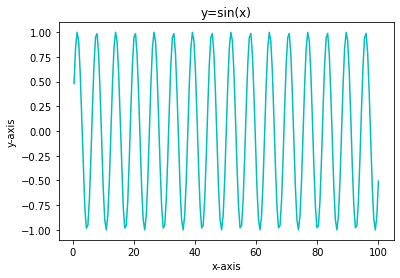

In [78]:
y = np.sin(x)

fig = plt.figure()

plt.title('y=sin(x)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.plot(x,y, 'c')
plt.show()


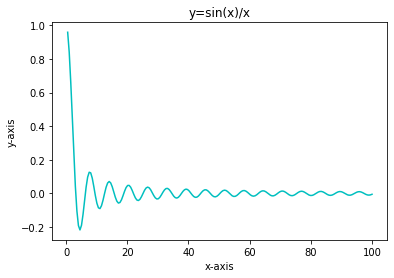

In [79]:
y = np.sin(x)/x

fig = plt.figure()

plt.title('y=sin(x)/x')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.plot(x,y, 'c')
plt.show()

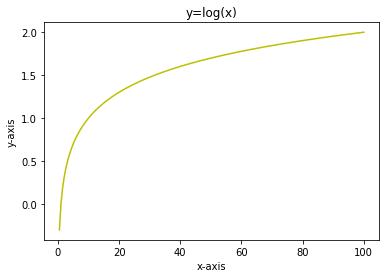

In [214]:
y = (np.log10(x))

fig = plt.figure()

plt.title('y=log(x)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.plot(x,y, 'y')
plt.show()

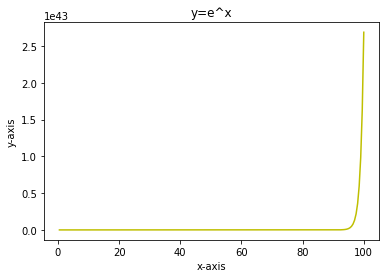

In [81]:
y = np.exp(x)


fig = plt.figure()

plt.title('y=e^x')
plt.xlabel('x-axis')
plt.ylabel('y-axis')


plt.plot(x,y, 'y')
plt.show()

# Q10

In [83]:

dataframe = pd.DataFrame(np.random.uniform(1,2, size=(20, 5)),columns=['a', 'b', 'c', 'd', 'e'])
print(dataframe)  

a = dataframe.std()
b = dataframe.mean()

maxi = 0
max = 0

for i in range(1,5):
  if a[maxi]<=a[i]:
    maxi = i;

for i in range(1,5):
  if b[i]<=b[max]:
    max = i;
  


print(a)
print("The column with highest standard deviation is", dataframe.columns[maxi])
print(b)
print("The column with highest mean is", dataframe.columns[max])


           a         b         c         d         e
0   1.821896  1.532923  1.458767  1.261468  1.230316
1   1.502741  1.592256  1.146286  1.203220  1.097307
2   1.426748  1.427407  1.904076  1.128755  1.018456
3   1.391335  1.929271  1.800338  1.004905  1.163898
4   1.732752  1.591606  1.901588  1.912535  1.097596
5   1.133501  1.539499  1.095183  1.886768  1.658953
6   1.554160  1.215529  1.876402  1.318062  1.223281
7   1.892443  1.814626  1.295156  1.298016  1.274464
8   1.667189  1.329089  1.318965  1.208015  1.925638
9   1.747412  1.758456  1.153394  1.846679  1.921646
10  1.519612  1.541154  1.411347  1.942356  1.671300
11  1.488583  1.324670  1.717470  1.522494  1.829123
12  1.817298  1.324202  1.498616  1.040255  1.193292
13  1.531936  1.019405  1.000413  1.127592  1.506889
14  1.923968  1.405489  1.903274  1.334186  1.942733
15  1.263941  1.838687  1.975750  1.233390  1.585182
16  1.289574  1.080271  1.956952  1.236754  1.957455
17  1.980382  1.063299  1.113769  1.705870  1.

# Q11

In [84]:
dataframe['f'] = dataframe.apply(lambda row:row['a'] + row['b'] + row['c']+ row['d']+ row['e'], axis =1)
dataframe['g'] = dataframe['f'].apply(lambda row:"LT8" if row<8 else "GT8")

print("Number of rows in the dataframe where the value in the column “g” is “LT8” is ", len(dataframe[dataframe["g"] == "LT8"]))

print("The standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” is", dataframe['f'][dataframe['g'] == 'LT8'].std() )

print("The standard deviation of the column “f” for the rows where the value in the column “g” is “GT8” is", dataframe['f'][dataframe['g'] == "GT8"].std())

Number of rows in the dataframe where the value in the column “g” is “LT8” is  16
The standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” is 0.48785264252912364
The standard deviation of the column “f” for the rows where the value in the column “g” is “GT8” is 0.19091009553283184


# Q12

In [85]:
A = np.array([[1,2,3],[4,5,6],[7,8,0]])
B = np.array([1,2,3])
C = np.zeros(A.shape)

for i in range(3):
  for j in range(3):
    C[i][j] = A[i][j] + B[j]
print(C)
print()
#broadcasting
C = A+B 


print(C)
print()

[[ 2.  4.  6.]
 [ 5.  7.  9.]
 [ 8. 10.  3.]]

[[ 2  4  6]
 [ 5  7  9]
 [ 8 10  3]]



# Q13

In [94]:
def minindex(arr):
  arr = arr.flatten()
  mini = 0
  n = len(arr)
  for i in range(n):
    if arr[i] < arr[mini]:
      mini = i
  return mini


arr = np.array([[1,2,3],[4,5,6],[7,0,8]])
print("Argmin from the program ", str(minindex(arr)))
print("Argmin using numpy:", str(np.argmin(arr)))

Argmin from the program  7
Argmin using numpy: 7
